Linear Reg : Boston Housing 



Mini Project 1 Guidelines:
1.    Business Context  :    Observe of average prices of houses in boston . 


2.    Business Question :     Does  criminal rate affect the housing price in boston  


3.    Data Pipeline :  show data of criminal happened around the areas 

- show  what type of crime around the area.
- averange crime rate.
- House materials : modern / old house 
-  price per sqrt of house/lot 



4.    Data Summary:
- average  price in the area :
- comparision of other area  :



5.    EDA (Trends/ Insights) : fill the none
- blotplox  
- histogram  ; normal discribution ?
- house distribution price 

6.    Hypothesis Testing :  t- test 
 H0: criminal NOT rate affects the housing price of houses in Boston.
 H1 : criminal   rate affects the housing price of houses in Boston.


7.    Summary
- Average price :
- percentage how much crimate affect housing price

8.    Next Steps: investigate more data 


Duration per presentation: 10 minutes

Problem statement: Predicting housing prices of town/ suburb base on criminal rate arounf the area

In [1]:


# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = pd.read_csv("../../iod/MiniProject/housing.csv")


In [3]:
df = pd.read_csv("../../iod/MiniProject/housing.csv",header=None, delim_whitespace=True )#python 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B', 'LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

In [ ]:
pd.set_option('display.max.column',506)
df

In [ ]:
df.index

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True, )
    plt.show()

 - The variables CRIM and ZN are positively skewed. This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.


- The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution, and the majority of the houses are away from Charles river (CHAS = 0).



- The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940.


- The variable DIS (average distances to five Boston employment centers) has a nearly exponential distribution, which indicates that most of the houses are closer to these employment centers.

- The variables TAX and RAD have a bimodal distribution., indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.



- The dependent variable MEDV seems to be slightly right skewed.

As the dependent variable is sightly skewed, we will apply a log transformation on the 'MEDV'
column and check the distribution of the transformed column.

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

In [ ]:
sns.histplot(data=df, x='MEDV_log', kde = True)

In [ ]:
df['MEDV_log'].skew()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
correlation_coefficient, p_value = pearsonr(df.CRIM, df.MEDV)

In [ ]:
p_value

In [ ]:
#reject null hypothesis

In [ ]:
# Set the significance level (e.g., 0.05)
alpha = 0.05

# Check if the p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship.")

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap ) 
plt.show()

In [ ]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'MEDV', y = 'LSTAT', data = df)
plt.show()

In [48]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
m = folium.Map(location=[42.361145, -71.057083],  zoom_start=10)

# I can add circle/marker one by one on the map
for i in range(0, len(df.head(1000))):
    folium.Marker(
        location=[df.iloc[i]['latitude'], df.iloc[i]['longitude']]
    ).add_to(m)

display(m)

KeyError: 'latitude'

Hypothesis testing 


H0: criminal NOT rate affects the housing price of houses in Boston.
 H1 : criminal   rate affects the housing price of houses in Boston.
    
    

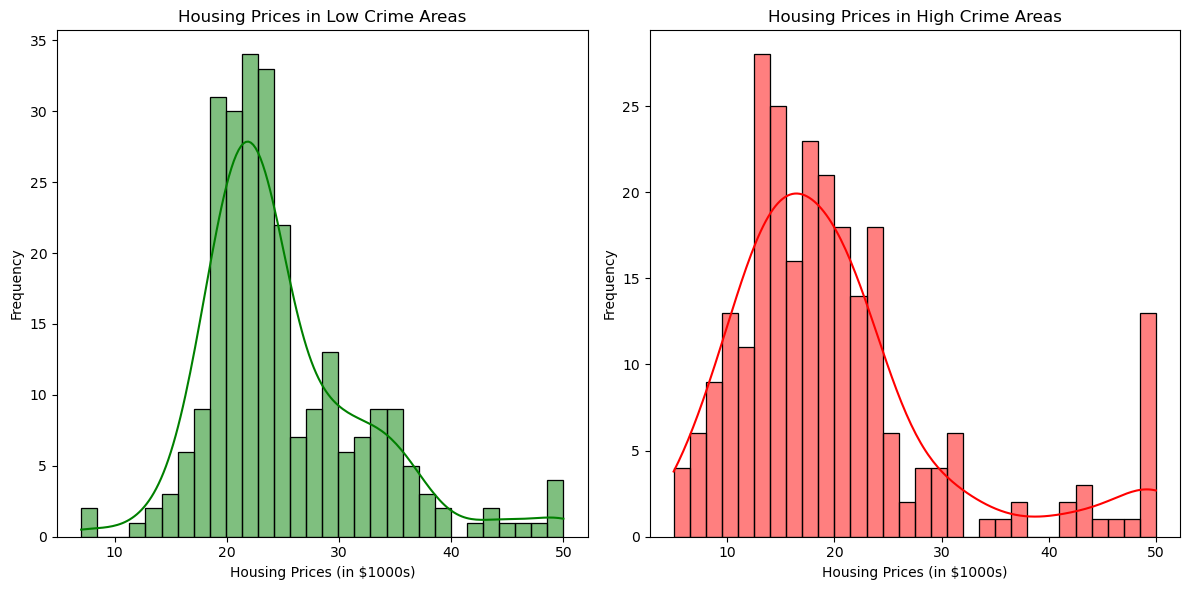

(6.120195334401908, 1.8796349126595716e-09)

In [8]:
from scipy.stats import ttest_ind

# Determine the median crime rate
median_crime_rate = df['CRIM'].median()

# Segment the data into low and high crime rate groups
low_crime_df = df[df['CRIM'] <= median_crime_rate]
high_crime_df = df[df['CRIM'] > median_crime_rate]

# Perform t-test on housing prices between the two groups
t_stat, p_val = ttest_ind(low_crime_df['MEDV'], high_crime_df['MEDV'])

# Histograms for housing prices in both groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(low_crime_df['MEDV'], kde=True, color='green', bins=30)
plt.title('Housing Prices in Low Crime Areas')
plt.xlabel('Housing Prices (in $1000s)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(high_crime_df['MEDV'], kde=True, color='red', bins=30)
plt.title('Housing Prices in High Crime Areas')
plt.xlabel('Housing Prices (in $1000s)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

t_stat, p_val

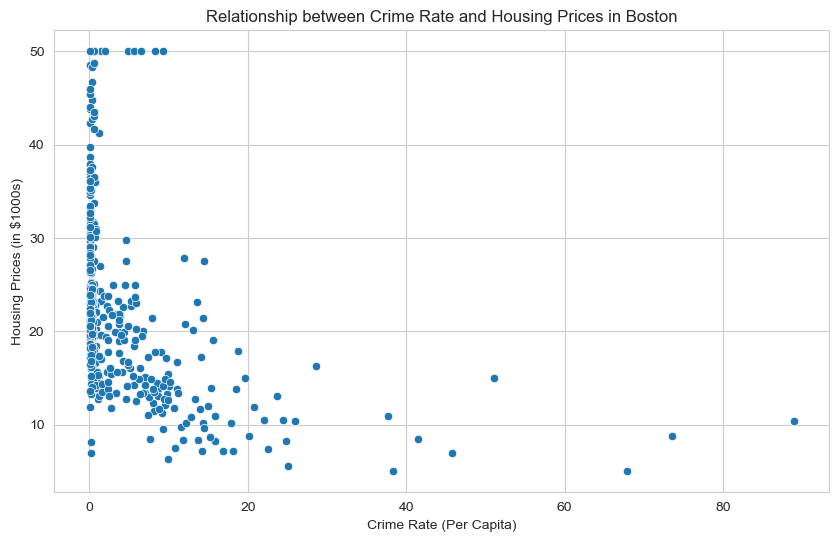

In [9]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CRIM', y='MEDV', data=df)
plt.title('Relationship between Crime Rate and Housing Prices in Boston')
plt.xlabel('Crime Rate (Per Capita)')
plt.ylabel('Housing Prices (in $1000s)')
plt.show()

In [10]:
median_crime = df['CRIM'].median()

# Create two datasets based on the crime rate
low_crime_df = df[df['CRIM'] <= median_crime]
high_crime_df = df[df['CRIM'] > median_crime]

# Perform the t-test on the two independent samples
t_stat, p_value = ttest_ind(low_crime_df['MEDV'], high_crime_df['MEDV'])

# Print the t-statistic and the p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Based on the p-value, you can make a conclusion regarding your hypotheses
if p_value < 0.05:  # Assuming a 5% significance level
    print("We reject the null hypothesis, suggesting there is a statistical difference in housing prices.")
else:
    print("We fail to reject the null hypothesis, suggesting there is no statistical difference in housing prices.")

T-statistic: 6.120195334401908
P-value: 1.8796349126595716e-09
We reject the null hypothesis, suggesting there is a statistical difference in housing prices.


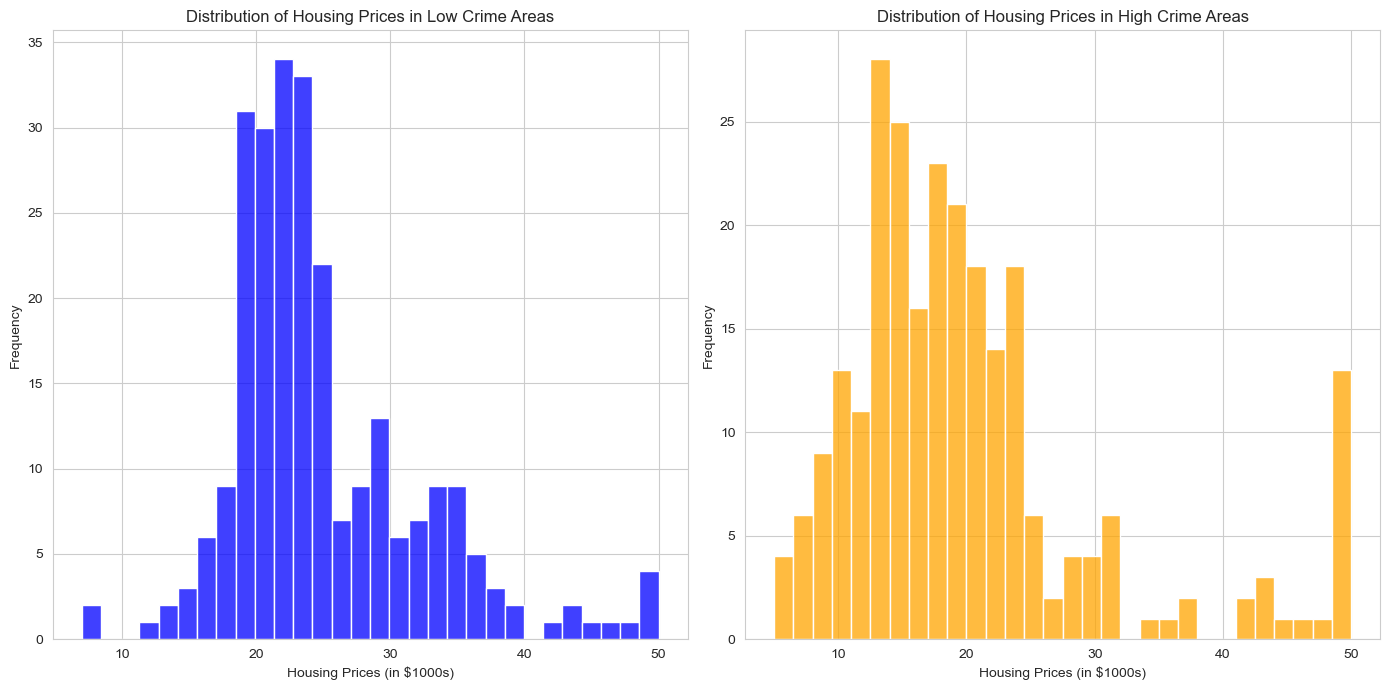

In [11]:
plt.figure(figsize=(14, 7))

# Histogram for low crime areas
plt.subplot(1, 2, 1)
sns.histplot(low_crime_df['MEDV'], kde=False, bins=30, color='blue')
plt.title('Distribution of Housing Prices in Low Crime Areas')
plt.xlabel('Housing Prices (in $1000s)')
plt.ylabel('Frequency')

# Histogram for high crime areas
plt.subplot(1, 2, 2)
sns.histplot(high_crime_df['MEDV'], kde=False, bins=30, color='orange')
plt.title('Distribution of Housing Prices in High Crime Areas')
plt.xlabel('Housing Prices (in $1000s)')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()
